# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Цель:</b> Установить параметры, позволяющие определять рыночную стоисмсть объектов недвижимости.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-следующие-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Построение-гистограмм-для-каждого-параметра." data-toc-modified-id="Исследование-следующие-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Построение-гистограмм-для-каждого-параметра.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование следующие параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм для каждого параметра.</a></span></li><li><span><a href="#Исследование-времени-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?" data-toc-modified-id="Исследование-времени-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование времени продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</a></span></li><li><span><a href="#Убираем-редкие-и-выбивающиеся-значения." data-toc-modified-id="Убираем-редкие-и-выбивающиеся-значения.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Убираем редкие и выбивающиеся значения.</a></span></li><li><span><a href="#Поиск-факторов-влияющих-на-стоимость-квартиры-больше-всего.-(Изучите,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучите-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года.)" data-toc-modified-id="Поиск-факторов-влияющих-на-стоимость-квартиры-больше-всего.-(Изучите,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучите-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года.)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Поиск факторов влияющих на стоимость квартиры больше всего.<br> (Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.)</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-квартиры-от-площади,-числа-комнат,-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-квартиры-от-площади,-числа-комнат,-удалённости-от-центра-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Зависимость цены квартиры от площади, числа комнат, удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-квартиры-от-этажа" data-toc-modified-id="Зависимость-цены-квартиры-от-этажа-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Зависимость цены квартиры от этажа</a></span></li><li><span><a href="#Зависимость-цены-квартиры-от-даты-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Зависимость-цены-квартиры-от-даты-размещения:-дня-недели,-месяца-и-года.-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Зависимость цены квартиры от даты размещения: дня недели, месяца и года.</a></span></li></ul></li><li><span><a href="#Средняя-цена-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-(Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-locality_name.)" data-toc-modified-id="Средняя-цена-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-(Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-locality_name.)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.<br> (Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.)</a></span></li><li><span><a href="#Исследование-предложениий-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-(locality_name).-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется,-—-это-и-будет-центральная-зона." data-toc-modified-id="Исследование-предложениий-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-(locality_name).-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется,-—-это-и-будет-центральная-зона.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Исследование предложениий квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.</a></span></li><li><span><a href="#Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всей-базе?" data-toc-modified-id="Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всей-базе?-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## 1 Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#размер графиков
sns.set(rc={"figure.figsize":(12, 6)})
#темная тема для графиков
plt.style.use('dark_background')

In [3]:
# читаем данные в качестве разделителей /t
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', decimal='.')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<b>Описание данных:</b><br>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
balcony — число балконов<br>
ceiling_height — высота потолков (м)<br>
city_сenters_nearest — расстояние до центра города (м)<br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
first_day_exposition — дата публикации<br>
floor — этаж<br>
floors_total — всего этажей в доме<br>
is_apartment — апартаменты (булев тип)<br>
kitchen_area — площадь кухни в квадратных метрах (м²)<br>
last_price — цена на момент снятия с публикации<br>
living_area — жилая площадь в квадратных метрах (м²)<br>
locality_name — название населённого пункта<br>
open_plan — свободная планировка (булев тип)<br>
parks_around_3000 — число парков в радиусе 3 км<br>
parks_nearest — расстояние до ближайшего парка (м)<br>
ponds_around_3000 — число водоёмов в радиусе 3 км<br>
ponds_nearest — расстояние до ближайшего водоёма (м)<br>
rooms — число комнат<br>
studio — квартира-студия (булев тип)<br>
total_area — площадь квартиры в квадратных метрах (м²)<br>
total_images — число фотографий квартиры в объявлении<br>

In [5]:
df.duplicated().sum()

0

**Вывод:**

Датасет содержит 22 столбца и 23699 строк, во многих столюцах имеются множественные пропуски, которые придется заполнять разными методами. 
Датасет также содержит различные типы данных, которые мы также преобразуем на втором шаге - предобработка данных. Дубликатов в данных нет.

## 2 Предобработка данных

Переименую столбцы cityCenters_nearest, parks_around3000, ponds_around3000

In [6]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

### 2.1 Пропуски в данных

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В таблице пропущено достаточно много значений, пробуtм их заполнить.<br>
В balcony промущенные значение можно заменить на 0, если человек не указал кол-во балконов, то высока вероятность что балконов нет.

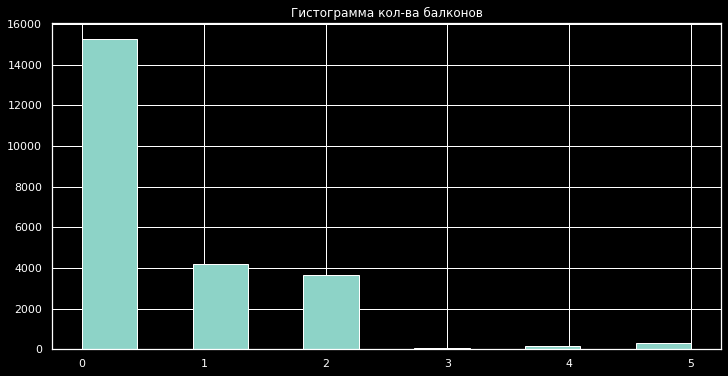

In [8]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].hist(bins=11)
plt.title('Гистограмма кол-ва балконов')
plt.show()

Если посмотреть данные в df, то можно заметить, что мы присвоили 0 балконов, даже квартирам с площадью более 100 м2, наврядли у таких квартир нет балконов, но учитывая общую тенденцию строительства многоквартирных домов без балконов, предположим, что полученные данные выглядят вполне правдоподобно. Вид гистограммф в принципе схож с распределением Пуассона

Много пропусков встречается в is_apartment, апартаменты достатончо новое определение для российского рынка недвижимости, скореее всего владельцы тех квартир, которые не являются апартаментами просто не знают это определения и поэтому не заполнили эти данные. Логичным выглядит замена пропусков на False

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Посмотрим пропуски в living_area

In [10]:
df[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,False,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Мы могли бы заполнить living_area (1903 пропущеных значения), если бы знали площадь кухни, ванны и туалета, но к сожалению, для этих строк эти данные неизвестны.

Проанализируем значения в ceiling_height

In [11]:
df['ceiling_height'].isna().sum()

9195

Попробуем заменить пропуски в данном столбце найдя в датафрейме теже дома использую данные о расстоянии до аэропртов и центра города

In [12]:
ceilings_pivot = df.pivot_table(index='city_centers_nearest', columns='airports_nearest', values='ceiling_height', aggfunc='first')
for index, row in df[df.ceiling_height.isna()].iterrows() :
    try:
        cell = ceilings_pivot.loc[ (row['city_centers_nearest']) , (row['airports_nearest']) ]
        if not(pd.isnull(cell)):                       # Проверяем не равно ли NaN значение ячейки в pivot_table
            df.loc[index, 'ceiling_height'] = cell       # Заменяем пропущенное значение высоты потолков в нашем df на значение из pivot
    except:
        pass # В случае если такого дома не существует
df.ceiling_height.isna().sum() 

5484

Оставшиеся пропущенные занчения в ceiling_height заполним медианой

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df.ceiling_height.isna().sum() 

0

In [14]:
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.  ,   3.03,   2.6 ,   2.5 ,   2.67,   2.56,
         3.05,   2.75,   2.9 ,   2.8 ,   2.55,   2.76,   3.2 ,   2.61,
         2.84,   3.25,   3.45,   3.28,   2.77,   2.85,   2.64,   2.57,
         4.15,   3.5 ,   3.3 ,   2.71,   4.  ,   2.92,   2.47,   2.73,
         3.1 ,   3.66,   2.34,   3.4 ,   3.06,   2.72,   2.54,   2.51,
         2.78,  25.  ,   2.58,   3.7 ,   2.52,   5.2 ,   3.34,   2.87,
         2.66,   2.59,   2.  ,   3.6 ,   2.45,   2.53,   3.11,   3.13,
         2.79,   3.8 ,   3.15,   3.55,   3.16,   3.62,   3.12,   2.74,
         2.96,   2.46,   2.62,   5.3 ,   5.  ,   2.95,   4.06,   2.94,
         3.82,   3.54,   3.53,   2.83,   4.7 ,   2.4 ,   3.38,   3.01,
         5.6 ,   3.65,   3.9 ,   3.18,   3.35,   2.3 ,   3.57,   2.48,
         2.82,   3.98,   2.63,   3.83,   2.68,   3.17,   3.52,   3.95,
         3.75,   2.88,   3.67,   3.87,   3.85,   3.86,   4.19,   3.24,
         4.8 ,   4.5 ,   4.2 ,   3.36,  32.  ,   3.08,   3.68,   3.07,
      

Значения ниже 2 метров и выше 7 (двухуровневые квартиры) выглядят неправдободобными посмотрим на них более подробно

In [15]:
df[df['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,0.0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,False,...,10.00,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


ceiling_height ниже 2 метров всего 3 значения, уберем их из таблицы

In [16]:
df = df.query('ceiling_height >= 2')

In [17]:
df[df['ceiling_height'] > 7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.20,2018-07-12T00:00:00,2,25.0,5.0,32.00,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.00,2018-11-12T00:00:00,3,32.0,3.0,53.00,2,False,...,8.00,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.00,2018-03-16T00:00:00,1,8.0,5.0,15.30,2,False,...,7.30,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.00,2018-02-01T00:00:00,2,25.0,9.0,30.00,2,False,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.00,2017-09-27T00:00:00,0,27.0,25.0,17.00,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.50,2018-10-03T00:00:00,1,24.0,5.0,19.50,1,True,...,5.50,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.00,2017-10-13T00:00:00,2,27.0,5.0,30.00,3,False,...,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.00,2017-08-08T00:00:00,2,26.0,9.0,21.30,3,False,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.00,2019-01-09T00:00:00,2,27.0,36.0,41.00,13,False,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.00,2018-08-15T00:00:00,1,8.3,16.0,19.30,14,False,...,8.30,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


значения 20 <= ceiling_height <=32 скорее всего образовались в результате ошибки в записи данным, необходимо уменьшить значения в 10 раз.   

In [18]:
df.loc[(df['ceiling_height'] >= 20), 'ceiling_height'] = df.loc[(df['ceiling_height'] >= 20), 'ceiling_height']/10

In [19]:
df[df['ceiling_height'] > 7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,False,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,False,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,False,...,8.0,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,False,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
18484,9,5500000.0,50.5,2018-02-26T00:00:00,2,14.0,15.0,31.0,14,False,...,8.0,0.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,32.0
20677,21,5800000.0,44.0,2016-11-06T00:00:00,1,8.3,22.0,20.0,7,False,...,10.5,2.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,465.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,False,...,NaN,0.0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,10.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Осталось 7 значений, о достоверности этих величин судить сложно и как их исправить варинтов у меня нет, их немного, поэтому просто уберем их из таблицы.

In [20]:
df = df[df['ceiling_height'] <= 7]

days_exposition - это сколько дней было размещено объявление (от публикации до снятия), пропущенные значения в данном столбце означают, что объявление еше размещено, оставляем эти пропуски без изменеий.

Пропуски в стобце floors_total

In [21]:
df.floors_total.isna().sum()

86

Попробуем заменить пропуски в данном столбце найдя в датафрейме теже дома использую данные  о расстоянии до аэропртов и центра города

In [22]:
floors_pivot = df.pivot_table(index='city_centers_nearest', columns='airports_nearest', values='floors_total', aggfunc='first')
for index, row in df[df.floors_total.isna()].iterrows() :
    try:
        cell = floors_pivot.loc[ (row['city_centers_nearest']) , (row['airports_nearest']) ]
        if not(pd.isnull(cell)):                       # Проверяем не равно ли NaN значение ячейки в pivot_table
            df.loc[index, 'floors_total'] = cell       # Заменяем пропущенное значение этажности в нашем df на значение из pivot
    except:
        pass # В случае если такого дома не существует
df.floors_total.isna().sum()

24

Оставшиеся 24 пропуска этажности заполним медианными значениями, не получилось заменить те значения, где нет подобного сочетания расстояний, т.е. дом не встречается дважды в таблице.

In [23]:
df.floors_total.fillna(value=df['floors_total'].median(), inplace=True)

In [24]:
df.floors_total.isna().sum()

0

Заменим NaN в locality_name на unknow

In [25]:
df.locality_name.fillna(value='unknow', inplace=True)

In [26]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2276
balcony                     0
locality_name               0
airports_nearest         5540
city_centers_nearest     5517
parks_around_3000        5516
parks_nearest           15612
ponds_around_3000        5516
ponds_nearest           14583
days_exposition          3181
dtype: int64

Столбцы: airports_nearest, city_сenters_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest,  kitchen_area оставлю без изменений, так как идей как адекватно заполнить пропуски нет.

### 2.2 Изменение типов данных

В first_day_exposition указана дата в формате object, приведем значения к формату врмеени

In [27]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Формат данных в столбца: parks_around_3000, ponds_around_3000, days_exposition - float64, а должен быть int64, однако, чтобы поменять формат, нужно что-то сделать с NaN, на данном этапе работы я пока не знаю что с ними делать, если будет необходимсоть выполним это действие на следущих этапах проекта
Сэкономим память, изменяя типы данных с float64 на float32.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23687 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23687 non-null  int64         
 1   last_price            23687 non-null  float64       
 2   total_area            23687 non-null  float64       
 3   first_day_exposition  23687 non-null  datetime64[ns]
 4   rooms                 23687 non-null  int64         
 5   ceiling_height        23687 non-null  float64       
 6   floors_total          23687 non-null  float64       
 7   living_area           21784 non-null  float64       
 8   floor                 23687 non-null  int64         
 9   is_apartment          23687 non-null  bool          
 10  studio                23687 non-null  bool          
 11  open_plan             23687 non-null  bool          
 12  kitchen_area          21411 non-null  float64       
 13  balcony         

In [29]:
df = df.astype({'total_area':'float32', 'last_price':'int64', 'ceiling_height':'float32', 'balcony':'int64', 'floors_total':'int64'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23687 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23687 non-null  int64         
 1   last_price            23687 non-null  int64         
 2   total_area            23687 non-null  float32       
 3   first_day_exposition  23687 non-null  datetime64[ns]
 4   rooms                 23687 non-null  int64         
 5   ceiling_height        23687 non-null  float32       
 6   floors_total          23687 non-null  int64         
 7   living_area           21784 non-null  float64       
 8   floor                 23687 non-null  int64         
 9   is_apartment          23687 non-null  bool          
 10  studio                23687 non-null  bool          
 11  open_plan             23687 non-null  bool          
 12  kitchen_area          21411 non-null  float64       
 13  balcony         

**Вывод:**

На аданном жтапе проекта была выполнена предобработка данных:
- Заполнены пропуски
- Изменен тип данных
- Выполнен анализ аномалий

## 3 Расчёты и добавление результатов в таблицу

Расчитываем и добавляем в таблицу цену квадратного метра

In [31]:
df['square_meter_price'] = df ['last_price'] / df['total_area'] 
df['square_meter_price'] = df['square_meter_price'].round()

Расчитываем и добавляем в таблицу день недели, месяц и год публикации объявления

In [32]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [33]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [34]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

Расчитываем и добавляем в таблицу этаж квартиры; варианты — первый, последний, другой

In [35]:
def floor_category(row):  
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'Первый'
    if floor == total:
        return 'Последний'
    else:
        return 'Другой'

df['floor_category'] = df.apply(floor_category, axis=1)
df['floor_category'].value_counts()

Другой       17434
Последний     3338
Первый        2915
Name: floor_category, dtype: int64

Расчитываем и добавляем в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей

In [36]:
df['ratio_living_total_area'] =  df['living_area'] / df['total_area']
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area']

Проверяем данные

In [37]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.400002,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.000000,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92786.0,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.000000,2015-07-24,3,3.00,14,NaN,9,False,...,3.0,234.0,424.0,408176.0,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,Другой,0.320000,0.410000


## 4 Исследовательский анализ данных

### 4.1 Исследование следующих параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм для каждого параметра.

#### 4.1.1 Изучаем площадь

In [38]:
df['total_area'].sort_values()

19904     12.000000
19546     13.000000
17961     13.000000
19807     13.000000
19558     13.200000
            ...    
5358     590.000000
15651    618.000000
3117     631.000000
12859    631.200012
19540    900.000000
Name: total_area, Length: 23687, dtype: float32

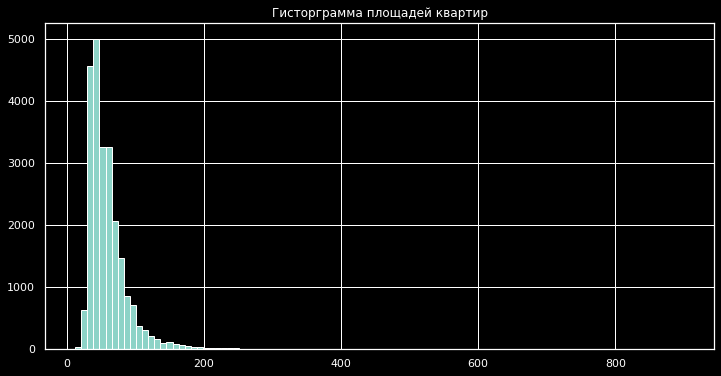

In [39]:
df['total_area'].hist(bins=100)
plt.title('Гисторграмма площадей квартир')
plt.show()

На данной гисторгамме мы можем видеть, "жирный" хвост справа. Построим еще одну гистограмму, но с диапазоном до 200 м2. 

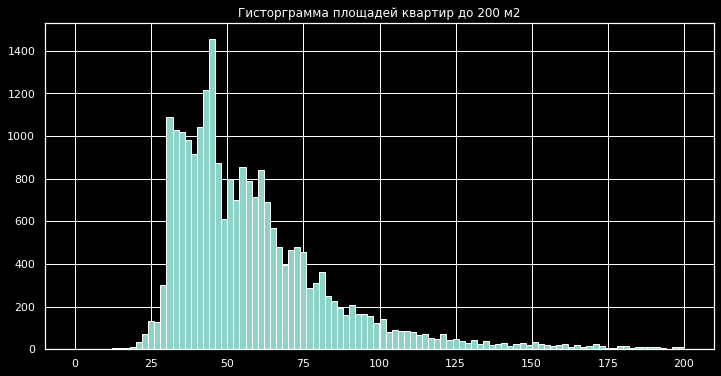

In [40]:
df['total_area'].hist(range = (0, 200), bins=100)
plt.title('Гисторграмма площадей квартир до 200 м2')
plt.show()

Гисторгамма похоже на рапсредение Пуассона единственное многовато значений в районе 45 м2, но это похоже на правду.
Обычно размеры двухкомнатных квартир составляют от 50 до 100 квадратных метров, что и соответствует проведенному анализу.

#### 4.1.2 Изучаем цену

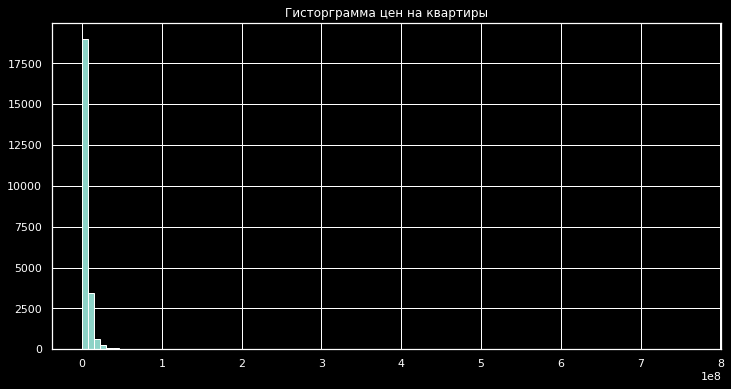

In [41]:
df['last_price'].hist(bins=100)
plt.title('Гисторграмма цен на квартиры')
plt.show()

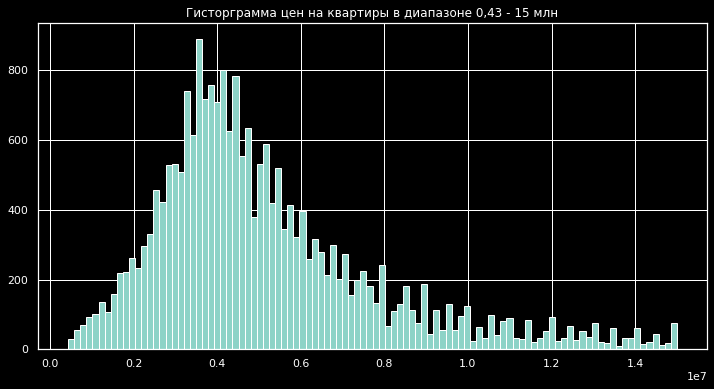

In [42]:
df['last_price'].hist(range = (430000, 15000000), bins=100)
plt.title('Гисторграмма цен на квартиры в диапазоне 0,43 - 15 млн')
plt.show()

Если рассматривать диапазон от 430000 до 15000000, то мы наблюдаем нормальное распределние значений цены. 

#### 4.1.3 Изучаем число комнат

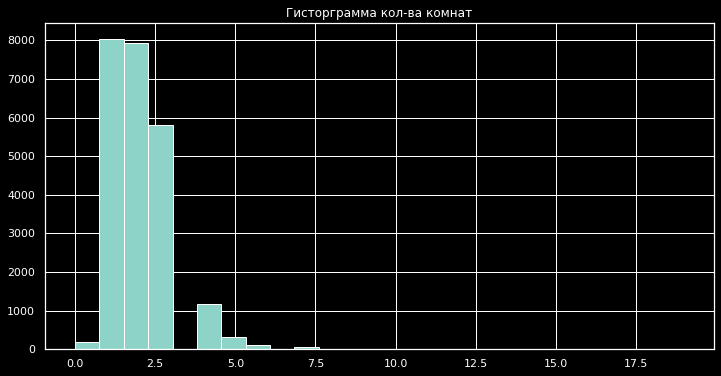

In [43]:
df['rooms'].hist(bins=25)
plt.title('Гисторграмма кол-ва комнат')
plt.show()

In [44]:
df['rooms'].value_counts()

1     8041
2     7935
3     5813
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

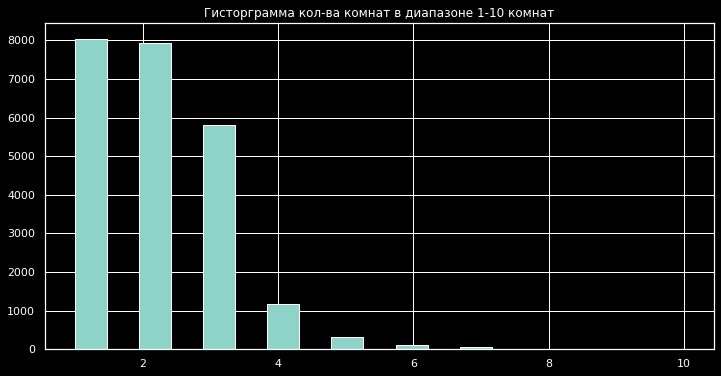

In [45]:
df['rooms'].hist(range = (1, 10), bins=19)
plt.title('Гисторграмма кол-ва комнат в диапазоне 1-10 комнат')
plt.show()

Число комнат соответствует распределению Пуассона

#### 4.1.4 Изучаем высоту потолков

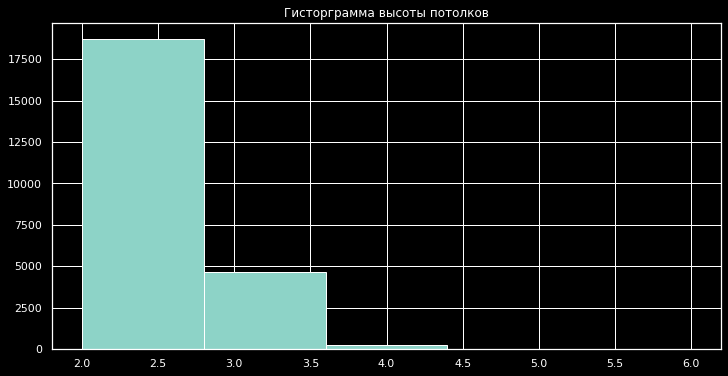

In [46]:
df['ceiling_height'].hist(bins=5)
plt.title('Гисторграмма высоты потолков')
plt.show()

In [47]:
df['ceiling_height'].value_counts()

2.65    6448
2.50    4071
2.70    2172
2.60    2074
3.00    1372
        ... 
5.20       1
3.43       1
4.30       1
3.39       1
3.59       1
Name: ceiling_height, Length: 168, dtype: int64

Много значений равных 2,65 метра, но это в основном те пропуски, которые мы заполнили медианой. В остальном мы можем наблюдать нормальное распределение.

### 4.2 Исследование времени продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

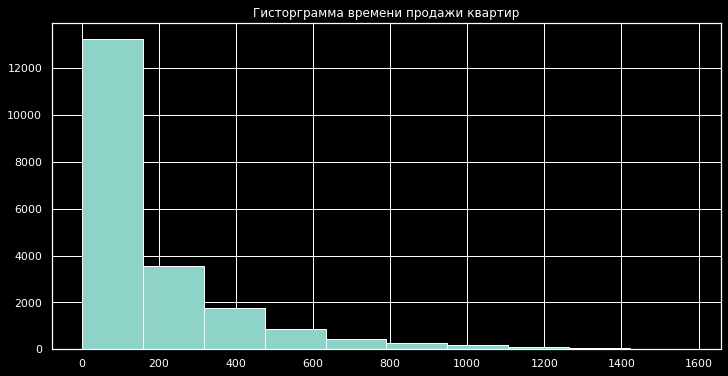

In [48]:
df['days_exposition'].hist()
plt.title('Гисторграмма времени продажи квартир')
plt.show()

Время продажи квартиры соответствует распределению Пуассона

In [49]:
df['days_exposition'].describe()

count    20506.000000
mean       180.878377
std        219.748584
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<b>Вывод:</b> Медиана = 95 дней, среднее кол-во дней продажи квартиры = 181 день, также мы можем наблюдать высокое стандартное отклонение, что может свидетельствовать о наличии е данных аномалий или выбросов. Если не пытаться устранить аномалии и  выбросы, то продажа быстрее 45 дней является очень быстрой, а более 232 дней необычайно долгой.

### 4.3 Убираем редкие и выбивающиеся значения.

Редкие и выбивающиеся значения убирал далее в ходе анализа в пункте 4.4

### 4.4 Поиск факторов влияющих на стоимость квартиры больше всего.<br> (Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.)

#### 4.4.1 Зависимость цены квартиры от площади, числа комнат, удалённости от центра

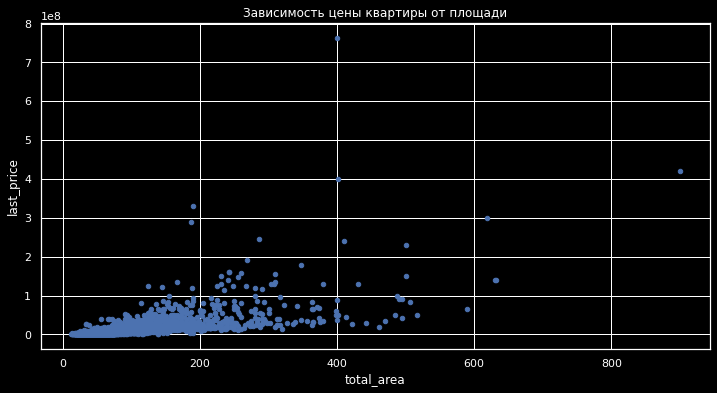

In [50]:
df.plot(x='total_area', y='last_price', kind='scatter') 
plt.title('Зависимость цены квартиры от площади')
plt.show()

На данной диаграмме мы можем наблюдать выбросы, явные выбросы квартиры со стоимостью более 100 млн. Далее в работе создадим копиюю df - good_df, из которого будем убирать все выбросы и аномалии и производить анализ с ним.

In [51]:
good_df = df.copy()

In [52]:
good_df = good_df[good_df['last_price'] < 1*10**8]

In [53]:
"Мы удалили {:.1%} данных".format(1 - good_df.shape[0] / df.shape[0])

'Мы удалили 0.2% данных'

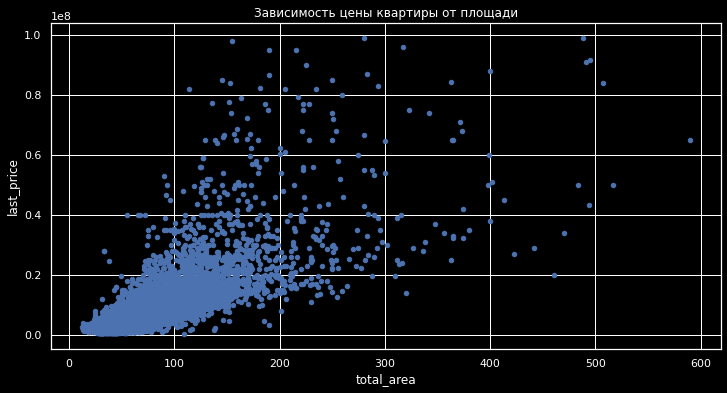

In [54]:
good_df.plot(x='total_area', y='last_price', kind='scatter') 
plt.title('Зависимость цены квартиры от площади')
plt.show()

In [55]:
good_df['total_area'].corr(good_df['last_price'])

0.7692076410712847

In [56]:
df['total_area'].corr(df['last_price'])

0.6537265003420966

<b>Вывод:</b> Стоимость квартиры увеличивается с ростом площади квартиры корреляция - 0,77. Наш фильтр сделал корреляцию заметнее.

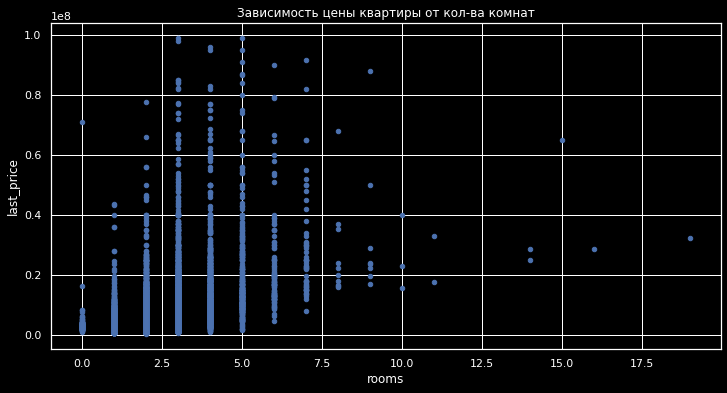

In [57]:
good_df.plot(x='rooms', y='last_price', kind='scatter')
plt.title('Зависимость цены квартиры от кол-ва комнат')
plt.show()

На диаграмме мы можем наблюдать определенные категории (кол-во комнат) попробуем использовать barplot

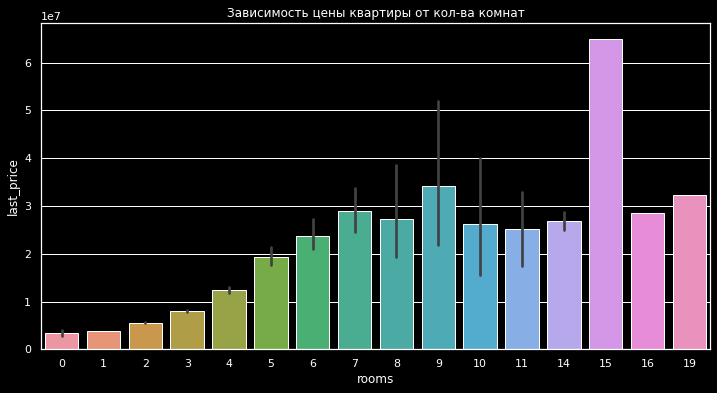

In [58]:
sns.barplot(x="rooms", y="last_price", data=good_df)
plt.title('Зависимость цены квартиры от кол-ва комнат')
plt.show()

На данной диаграмме мы можем наблюдать выброс для квартир с 15 комнатами, а также есть опредленаая зависимость для квартир с кол-вом комнат до 9.

In [59]:
a = len(good_df)
good_df = good_df[good_df['rooms'] <= 9]
b = len(good_df)
"Мы отрезали {:.10%} данных".format(1 - b / a)

'Мы отрезали 0.0422832981% данных'

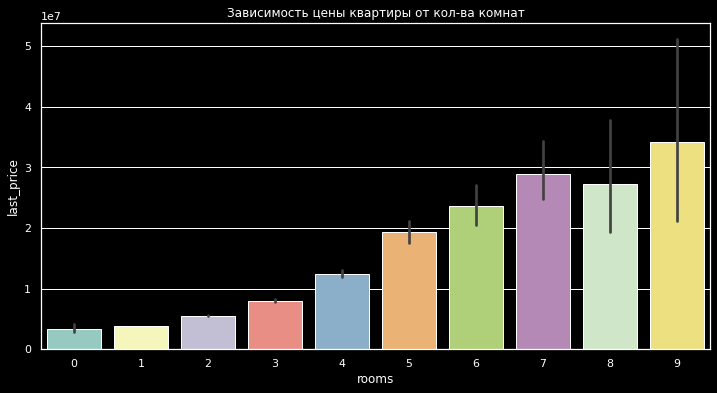

In [60]:
sns.barplot(x="rooms", y="last_price", data=good_df)
plt.title('Зависимость цены квартиры от кол-ва комнат')
plt.show()

<b>Вывод:</b> Чем больше комнат тем выше стоимость, на диаграмме немного выбиваетсю квартиры с числом комнат - 8.

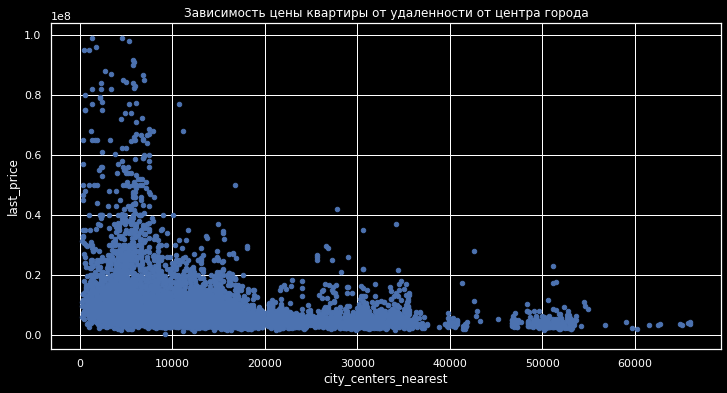

In [61]:
good_df.plot(x='city_centers_nearest', y='last_price', kind='scatter')
plt.title('Зависимость цены квартиры от удаленности от центра города')
plt.show()

In [62]:
good_df['locality_name'].value_counts()

Санкт-Петербург                   15665
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: locality_name, Length: 365, dtype: int64

Проанализируем самый крупный город в данных - Санкт-Петербург, так как в маленьких деревня явно искать завиисмость по удаленности от центра смысла нет. По хорошему нужно сделать некую категорийность по размеру городов.

In [63]:
good_df_spb = good_df[good_df['locality_name'] == 'Санкт-Петербург']

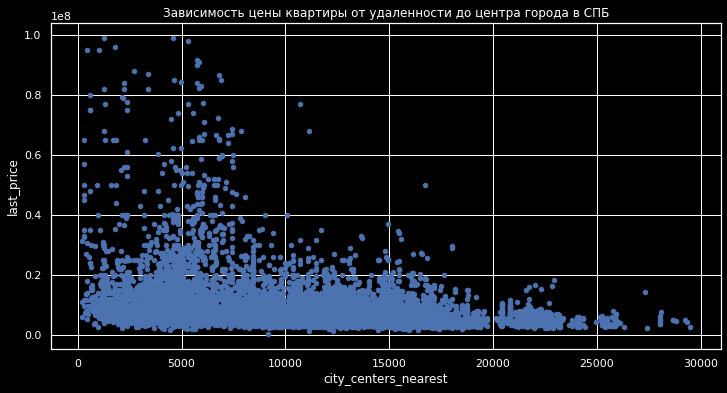

In [64]:
good_df_spb.plot(x='city_centers_nearest', y='last_price', kind='scatter')
plt.title('Зависимость цены квартиры от удаленности до центра города в СПБ')
plt.show()

<b>Вывод:</b> Зависиомсть есть, чем дальше от центра тем ниже цена квартиры.

#### 4.4.2 Зависимость цены квартиры от этажа

In [65]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.400002,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.000000,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92786.0,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.000000,2015-07-24,3,3.00,14,NaN,9,False,...,3.0,234.0,424.0,408176.0,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,Другой,0.320000,0.410000


In [66]:
good_df.groupby('floor_category')['last_price'].median()

floor_category
Другой       4832500.0
Первый       3900000.0
Последний    4300000.0
Name: last_price, dtype: float64

<b>Вывод:</b> Квартиры на первом этаже самые дешевые, квартиры на последнем этаже дешевле, чем другие квартиры. Cкорее всего, низкую цену на квартиры на первом и последнем этажах можно аргументировать плохими условиями - шум от улиц и моторов лифта, охлаждаемость помещения зимой.

#### 4.4.3 Зависимость цены квартиры от даты размещения: дня недели, месяца и года.

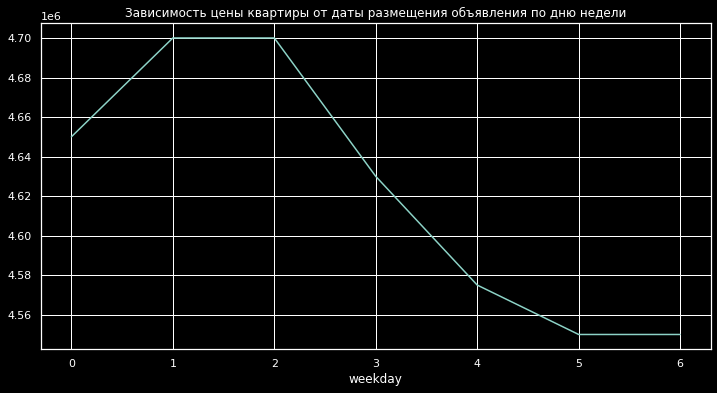

In [67]:
good_df.groupby('weekday')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по дню недели')
plt.show()

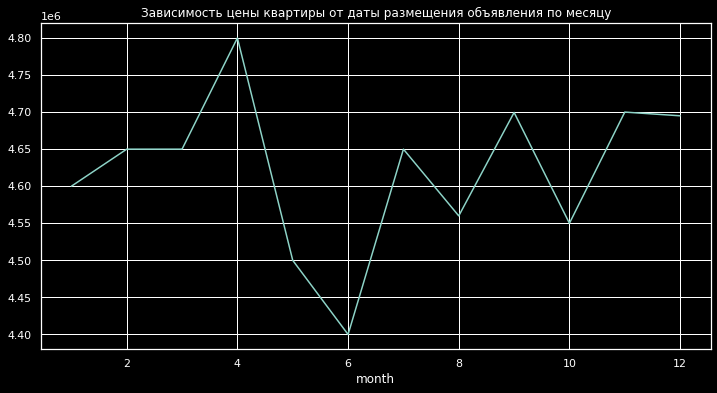

In [68]:
good_df.groupby('month')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по месяцу')
plt.show()

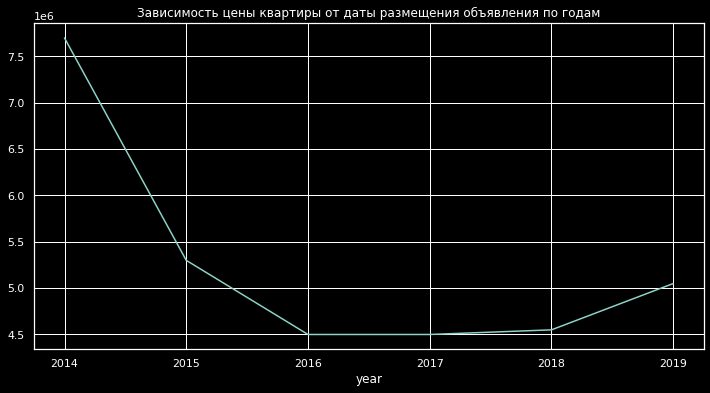

In [69]:
good_df.groupby('year')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по годам')
plt.show()

<b>Вывод:</b> Цена квартир размещенных на выходных ниже, также меньше и кол-во объявлений. Летом продовать квартиру не выгодно.
А на последнем графике отлично видно дату - "Крым наш", как и на любом финансовом графиоке в нашей стране:) 

### 4.5 Средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.<br> (Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.)

In [70]:
good_df.groupby('locality_name')['square_meter_price'].agg(['mean', 'count']).sort_values('count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,113573.513693,15665
посёлок Мурино,85752.181992,522
посёлок Шушары,78677.377273,440
Всеволожск,68654.474874,398
Пушкин,103125.818428,369
Колпино,75424.571006,338
посёлок Парголово,90175.886850,327
Гатчина,68746.110749,307
деревня Кудрово,92473.588629,299


In [71]:
good_df.groupby('locality_name')['square_meter_price'].agg(['mean', 'count']).sort_values('mean').head(10)

,mean,count
locality_name,,
деревня Старополье,11206.333333,3
посёлок станции Свирь,11481.500000,2
деревня Вахнова Кара,11688.000000,1
деревня Выскатка,12335.500000,2
поселок Совхозный,12629.500000,2
деревня Малая Романовка,12725.000000,1
поселок Тёсово-4,12931.000000,1
деревня Сижно,13710.000000,1
деревня Ям-Тесово,13711.500000,2


<b>Вывод:</b> Самая высокая стоимость м2 в СПБ

### 4.6 Исследование предложениий квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [72]:
# я уже делал сортировку по Санкт_петербургу good_df_spb
good_df_spb['center_distance'] = np.round(good_df_spb['city_centers_nearest']/1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
good_df_spb['center_distance'].head()

0    16.0
2    14.0
3     7.0
4     8.0
7    12.0
Name: center_distance, dtype: float64

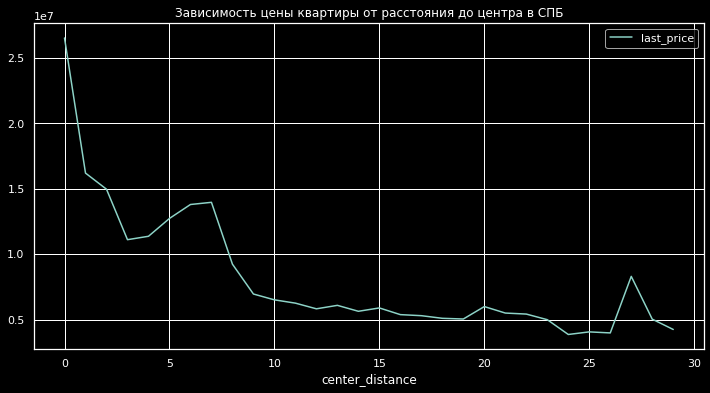

In [74]:
good_df_spb.pivot_table(index='center_distance', values='last_price').plot()
plt.title('Зависимость цены квартиры от расстояния до центра в СПБ')
plt.show()

<b>Вывод:</b> Пики на графике - это дорогое жилье, на примере Москвы, Москва Сити, в СПБ - "Золотой треугольник" Центр города по этому графику радиусом 10 км.

### 4.7 Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [75]:
good_df_spb[good_df_spb['center_distance'] <= 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,ratio_living_total_area,ratio_kitchen_total_area,center_distance
3,0,64900000,159.000000,2015-07-24,3,3.00,14,NaN,9,False,...,234.0,424.0,408176.0,4,7,2015,Другой,NaN,NaN,7.0
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.0,1,6,2018,Другой,0.320000,0.410000,8.0
21,13,3200000,31.600000,2018-03-14,1,2.65,5,16.9,2,False,...,NaN,310.0,101266.0,2,3,2018,Другой,0.534810,0.180380,10.0
24,8,6500000,97.199997,2015-10-31,2,2.65,3,46.5,1,False,...,124.0,265.0,66872.0,5,10,2015,Первый,0.478395,0.201646,2.0
35,6,15500000,149.000000,2017-06-26,5,2.65,5,104.0,4,False,...,779.0,644.0,104027.0,0,6,2017,Другой,0.697987,0.114094,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23681,13,5250000,43.000000,2018-05-11,2,2.50,5,29.0,2,False,...,660.0,80.0,122093.0,4,5,2018,Другой,0.674419,0.139535,7.0
23690,3,5500000,52.000000,2018-07-19,2,2.65,5,31.0,2,False,...,NaN,15.0,105769.0,3,7,2018,Другой,0.596154,0.115385,6.0
23691,11,9470000,72.900002,2016-10-13,2,2.75,25,40.3,7,False,...,806.0,519.0,129904.0,3,10,2016,Другой,0.552812,0.145405,4.0
23694,9,9700000,133.809998,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,NaN,72491.0,1,3,2017,Другой,0.547792,0.103356,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e4cb85b10>,
      dtype=object)

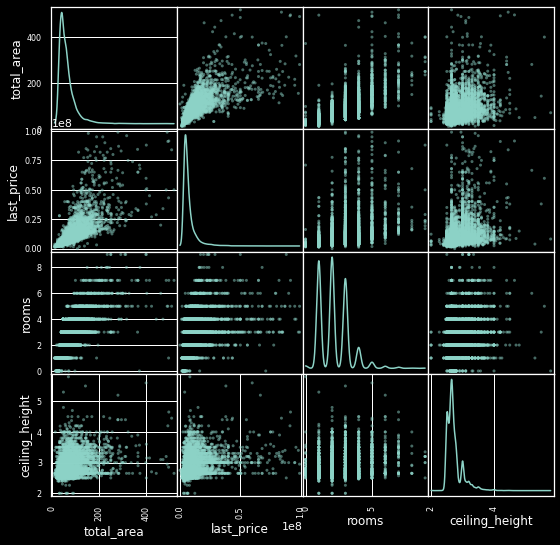

In [76]:
cols = ['total_area', 'last_price', 'rooms', 'ceiling_height']
pd.plotting.scatter_matrix(good_df_spb[cols], diagonal='kde', figsize=(9, 9
))

In [77]:
good_df_spb[cols].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.778622,0.764541,0.440470
last_price,0.778622,1.000000,0.485397,0.429010
rooms,0.764541,0.485397,1.000000,0.268574
ceiling_height,0.440470,0.429010,0.268574,1.000000


In [78]:
good_df_spb.groupby('floor_category')['last_price'].median()

floor_category
Другой       5600000.0
Первый       4851000.0
Последний    5597000.0
Name: last_price, dtype: float64

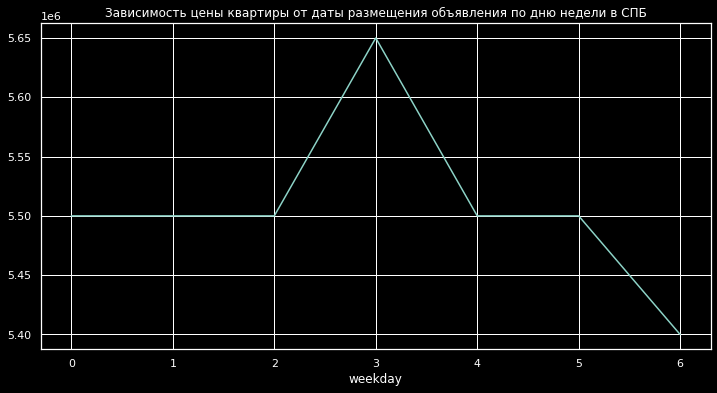

In [79]:
good_df_spb.groupby('weekday')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по дню недели в СПБ')
plt.show()

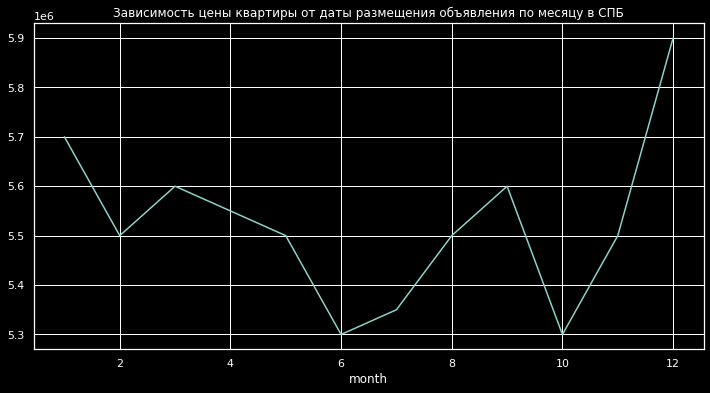

In [80]:
good_df_spb.groupby('month')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по месяцу в СПБ')
plt.show()

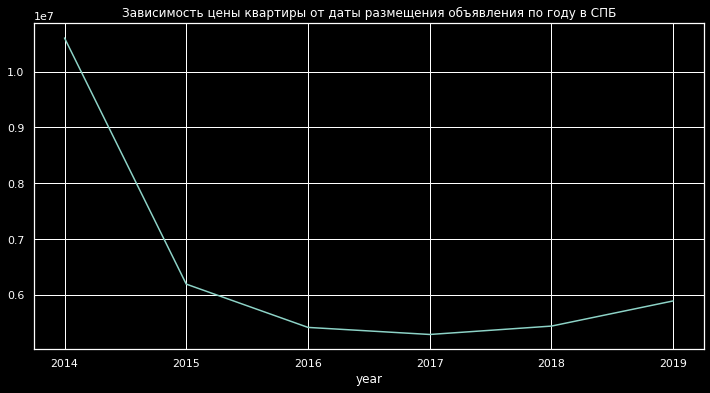

In [81]:
good_df_spb.groupby('year')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по году в СПБ')
plt.show()

<b>Вывод:</b> Отличия данных для центра СПБ от общих выводов по всей базе минимальны.

## 5 Общий вывод

В ходе исследования были выполнены следующие этапы: 
1) Предобработка данных. На данном этапе были обнаружны пропуски в данных, по возможности они были заполнены. Был изменен формат данных для возможности последующей обработки.
2) Расчеты и добавление результатов. Были расчитаны и добавлены в таблицу данные которых не хватало для анализа.
3) Исследовательский анализ. Были определны факторы флияющие на стоиомсть квартры - площадь квартиры, число комнат, этаж, удалённость от центра, дата размещения объявления, Было проведено сравнение всех представленных данных с выборкой данных по центральному району Санкт-Петербурга. 